# PETSc performance breakdown

This notebook runs timing breakdown using PETSc events:

- Warmup + timed solve per approach and mesh size
- Event times: SNESSolve, KSPSolve, PCSetUp, PCApply, Jacobian/Residual evals, MatAssembly
- Outputs a CSV of results

You can tweak the mesh sizes and approaches as needed.

Highly inspired by this work: https://github.com/thomasgibson/tabula-rasa

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

from pathlib import Path
from typing import List
import matplotlib.pyplot as plt

from perphil.experiments.iterative_bench import Approach
from perphil.experiments.petsc_profiling import run_perf_sweep, save_perf_csv

RESULTS_PATH = Path("results-conforming-2d/petsc_profiling")

## Parameters

In [2]:
# mesh_sizes: List[int] = [4, 8, 16, 32, 64, 128]  # this is the one for final results
mesh_sizes: List[int] = [4, 8, 16, 32, 64]  # this is the one for final results
# mesh_sizes: List[int] = [4, 8, 16, 32]
# mesh_sizes: List[int] = [5, 10, 15, 20]
# mesh_sizes: List[int] = [5, 10, 15, 20]
approaches: List[Approach] = [
    Approach.PLAIN_GMRES,
    Approach.GMRES_ILU,
    Approach.SS_GMRES,
    Approach.SS_GMRES_ILU,
    Approach.PICARD_MUMPS,
    # Approach.MONOLITHIC_MUMPS,
]
extra_events: List[str] = []

## Run and collect

In [3]:
df = run_perf_sweep(mesh_sizes, approaches, repeats=5, backend="events")
df.sort_values(["nx", "approach"])

[perf] nx=4 GMRES: iters=10, time_total=5.605e-02s, KSPSolve=4.436e-04s, PCApply=3.920e-05s, flops_total=8.851e+05 (backend=events, repeats=5)
[perf] nx=4 GMRES + ILU PC: iters=5, time_total=3.541e-02s, KSPSolve=4.158e-04s, PCApply=8.160e-05s, flops_total=8.348e+05 (backend=events, repeats=5)
[perf] nx=4 Scale-Splitting GMRES: iters=4, time_total=1.224e-01s, KSPSolve=6.808e-03s, PCApply=6.467e-03s, flops_total=9.144e+05 (backend=events, repeats=5)
[perf] nx=4 Scale-Splitting GMRES + ILU PC: iters=4, time_total=1.135e-01s, KSPSolve=1.148e-03s, PCApply=9.746e-04s, flops_total=1.582e+06 (backend=events, repeats=5)
[perf] nx=4 Scaling-Splitting Picard with MUMPS: iters=16, time_total=1.206e+00s, KSPSolve=0.000e+00s, PCApply=0.000e+00s, flops_total=6.005e+07 (backend=events, repeats=5)
[perf] nx=8 GMRES: iters=40, time_total=3.757e-02s, KSPSolve=1.696e-03s, PCApply=6.770e-05s, flops_total=8.905e+06 (backend=events, repeats=5)
[perf] nx=8 GMRES + ILU PC: iters=7, time_total=3.621e-02s, KSPSo

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_PCApply,flops_PCSetUp,mflops_PCSetUp,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_SNESFunctionEval,mflops_SNESFunctionEval,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,4,4,50,16,10,3.399586e-07,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.056053,0.280267,...,0.000000,0.0,0.000000,0.0,0.0,8.960000e+04,3.652104,8.851200e+05,284496.0,0.0
1,GMRES + ILU PC,4,4,50,16,5,1.936255e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.035410,0.177051,...,478.676471,11105.0,22.798193,0.0,0.0,8.960000e+04,3.585922,8.348100e+05,284496.0,0.0
2,Scale-Splitting GMRES,4,4,50,16,4,4.775965e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.122415,0.612073,...,4.770668,74240.0,0.186292,0.0,0.0,8.960000e+04,3.119560,9.144150e+05,288520.0,2048.0
3,Scale-Splitting GMRES + ILU PC,4,4,50,16,4,4.775968e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.113542,0.567712,...,238.328545,74240.0,0.198605,0.0,0.0,8.960000e+04,2.936232,1.581590e+06,291208.0,2176.0
4,Scaling-Splitting Picard with MUMPS,4,4,50,16,16,1.631627e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",1.205891,6.029456,...,0.000000,0.0,0.000000,0.0,0.0,1.498720e+06,8.802481,6.004538e+07,292616.0,0.0
5,GMRES,8,8,162,64,40,5.761899e-04,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.037570,0.187849,...,0.000000,0.0,0.000000,0.0,0.0,3.584000e+05,13.301762,8.905370e+06,292616.0,0.0
6,GMRES + ILU PC,8,8,162,64,7,2.493865e-03,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.036212,0.181060,...,1685.714286,79385.0,143.165014,0.0,0.0,3.584000e+05,13.450728,3.715780e+06,292616.0,0.0
7,Scale-Splitting GMRES,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.104874,0.524372,...,22.908639,296960.0,0.904937,0.0,0.0,3.584000e+05,12.945358,3.762305e+06,292616.0,0.0
8,Scale-Splitting GMRES + ILU PC,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.093119,0.465594,...,754.131759,296960.0,0.959523,0.0,0.0,3.584000e+05,15.738351,7.789820e+06,293640.0,1024.0
9,Scaling-Splitting Picard with MUMPS,8,8,162,64,63,5.317042e-04,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",3.810645,19.053223,...,0.000000,0.0,0.000000,0.0,0.0,2.256896e+07,52.224494,1.058376e+09,293640.0,0.0


## Save CSV (optional)

In [4]:
save_perf_csv(df, RESULTS_PATH / "petsc_perf_breakdown.csv")
df.head()

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_PCApply,flops_PCSetUp,mflops_PCSetUp,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_SNESFunctionEval,mflops_SNESFunctionEval,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,4,4,50,16,10,3.399586e-07,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.056053,0.280267,...,0.000000,0.0,0.000000,0.0,0.0,89600.0,3.652104,885120.0,284496.0,0.0
1,GMRES + ILU PC,4,4,50,16,5,1.936255e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.035410,0.177051,...,478.676471,11105.0,22.798193,0.0,0.0,89600.0,3.585922,834810.0,284496.0,0.0
2,Scale-Splitting GMRES,4,4,50,16,4,4.775965e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.122415,0.612073,...,4.770668,74240.0,0.186292,0.0,0.0,89600.0,3.119560,914415.0,288520.0,2048.0
3,Scale-Splitting GMRES + ILU PC,4,4,50,16,4,4.775968e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.113542,0.567712,...,238.328545,74240.0,0.198605,0.0,0.0,89600.0,2.936232,1581590.0,291208.0,2176.0
4,Scaling-Splitting Picard with MUMPS,4,4,50,16,16,1.631627e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",1.205891,6.029456,...,0.000000,0.0,0.000000,0.0,0.0,1498720.0,8.802481,60045375.0,292616.0,0.0


## Plot: Total Time (average wall time), Total Iterations, and FLOPS.

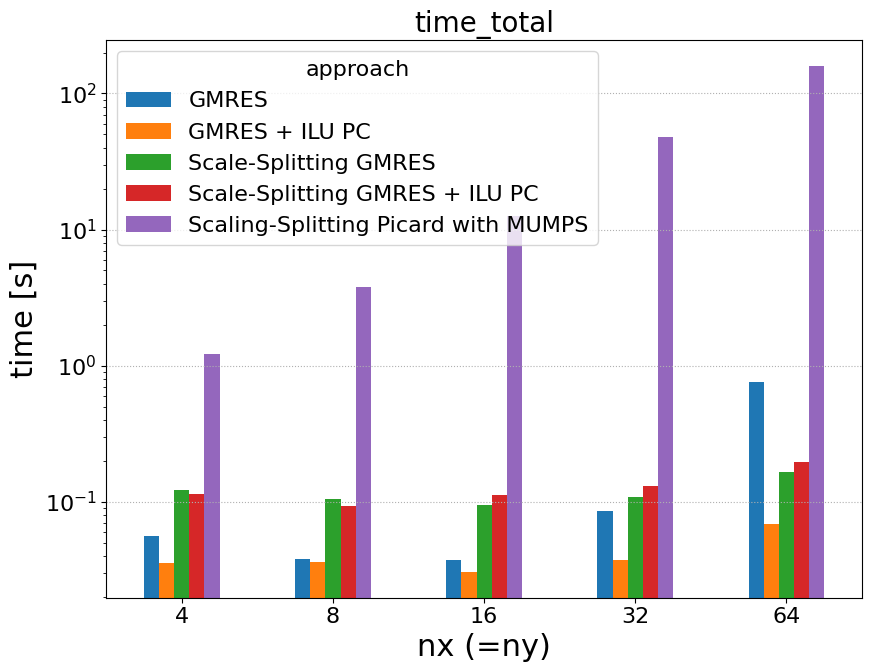

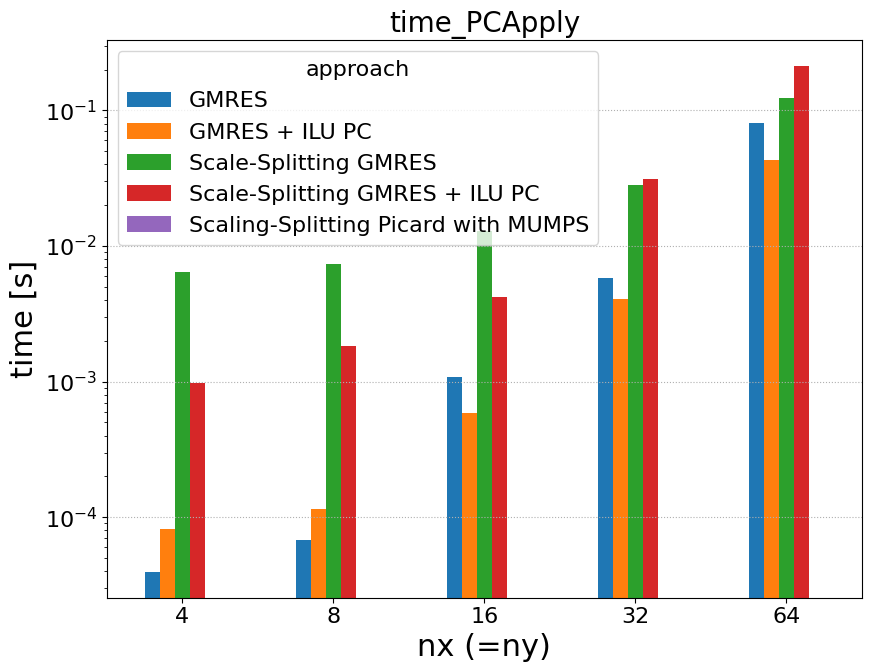

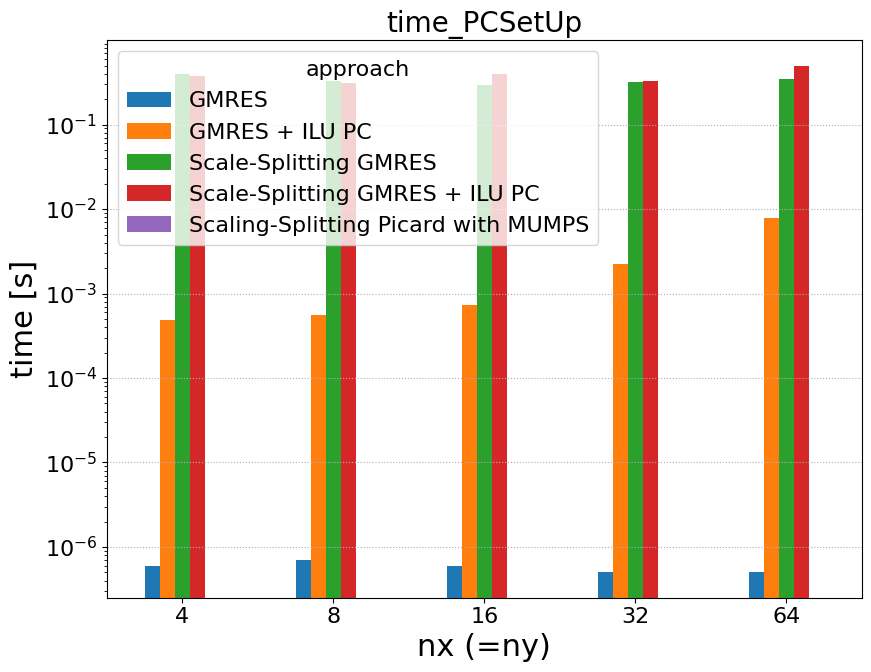

In [5]:
for metric in ("time_total", "time_PCApply", "time_PCSetUp"):
    pivot = df.pivot(index="nx", columns="approach", values=metric).sort_index()
    ax = pivot.plot(kind="bar", figsize=(9, 7), title=metric, logy=True, rot=0)
    ax.set_xlabel("nx (=ny)")
    ax.set_ylabel("time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"petsc_{metric}_bar.png")
    plt.show()

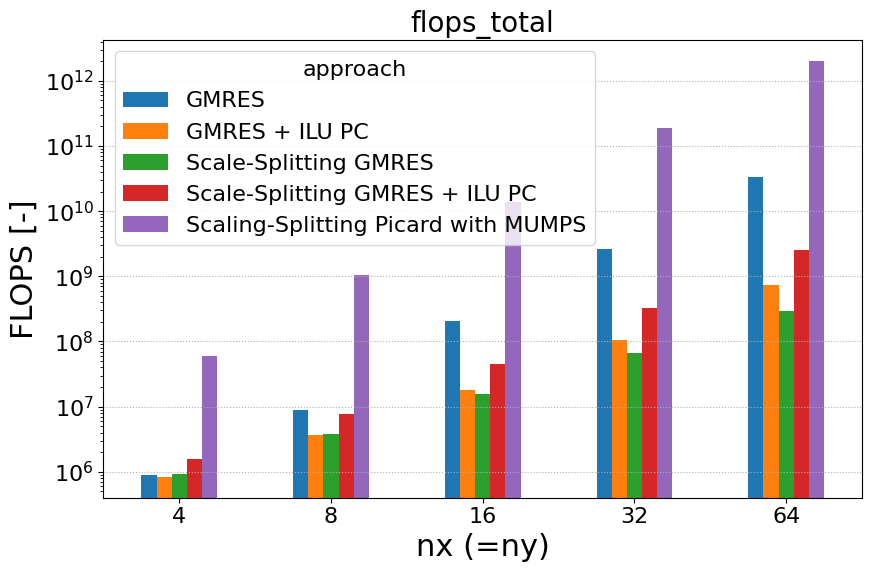

In [6]:
pivot = df.pivot(index="nx", columns="approach", values="flops_total").sort_index()
ax = pivot.plot(kind="bar", figsize=(9, 6), title="flops_total", logy=True, rot=0)
ax.set_xlabel("nx (=ny)")
ax.set_ylabel("FLOPS [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_flops_bar.png")
plt.show()

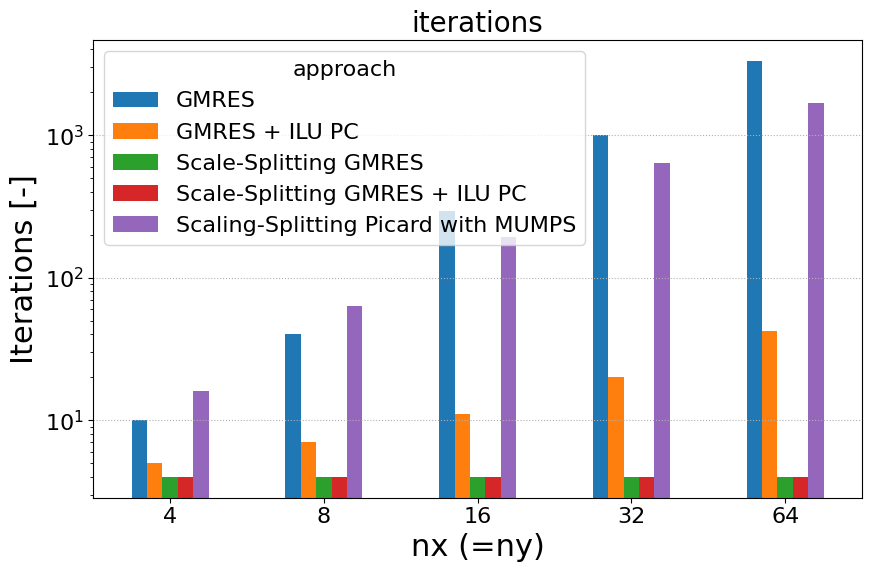

In [7]:
pivot = df.pivot(index="nx", columns="approach", values="iterations").sort_index()
ax = pivot.plot(kind="bar", figsize=(9, 6), title="iterations", logy=True, rot=0)
ax.set_xlabel("nx (=ny)")
ax.set_ylabel("Iterations [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_iterations_bar.png")
plt.show()

In [8]:
df

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_PCApply,flops_PCSetUp,mflops_PCSetUp,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_SNESFunctionEval,mflops_SNESFunctionEval,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,4,4,50,16,10,3.399586e-07,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.056053,0.280267,...,0.000000,0.0,0.000000,0.0,0.0,8.960000e+04,3.652104,8.851200e+05,284496.0,0.0
1,GMRES + ILU PC,4,4,50,16,5,1.936255e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.035410,0.177051,...,478.676471,11105.0,22.798193,0.0,0.0,8.960000e+04,3.585922,8.348100e+05,284496.0,0.0
2,Scale-Splitting GMRES,4,4,50,16,4,4.775965e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.122415,0.612073,...,4.770668,74240.0,0.186292,0.0,0.0,8.960000e+04,3.119560,9.144150e+05,288520.0,2048.0
3,Scale-Splitting GMRES + ILU PC,4,4,50,16,4,4.775968e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.113542,0.567712,...,238.328545,74240.0,0.198605,0.0,0.0,8.960000e+04,2.936232,1.581590e+06,291208.0,2176.0
4,Scaling-Splitting Picard with MUMPS,4,4,50,16,16,1.631627e-05,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",1.205891,6.029456,...,0.000000,0.0,0.000000,0.0,0.0,1.498720e+06,8.802481,6.004538e+07,292616.0,0.0
5,GMRES,8,8,162,64,40,5.761899e-04,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.037570,0.187849,...,0.000000,0.0,0.000000,0.0,0.0,3.584000e+05,13.301762,8.905370e+06,292616.0,0.0
6,GMRES + ILU PC,8,8,162,64,7,2.493865e-03,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.036212,0.181060,...,1685.714286,79385.0,143.165014,0.0,0.0,3.584000e+05,13.450728,3.715780e+06,292616.0,0.0
7,Scale-Splitting GMRES,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.104874,0.524372,...,22.908639,296960.0,0.904937,0.0,0.0,3.584000e+05,12.945358,3.762305e+06,292616.0,0.0
8,Scale-Splitting GMRES + ILU PC,8,8,162,64,4,4.663785e-03,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.093119,0.465594,...,754.131759,296960.0,0.959523,0.0,0.0,3.584000e+05,15.738351,7.789820e+06,293640.0,1024.0
9,Scaling-Splitting Picard with MUMPS,8,8,162,64,63,5.317042e-04,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",3.810645,19.053223,...,0.000000,0.0,0.000000,0.0,0.0,2.256896e+07,52.224494,1.058376e+09,293640.0,0.0
